### Import and Read The Data

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import warnings
warnings.filterwarnings("ignore")

In [44]:
sns.set_theme(style="darkgrid", font_scale=1, rc={"axes.titlesize":18})

In [45]:
df = pd.read_csv("../data/external/Mall_Customers.csv")

In [46]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df.shape

(200, 5)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### EDA

In [50]:
df.drop("CustomerID", axis=1, inplace=True)

In [51]:
df_numeric = df.select_dtypes(include="int64")

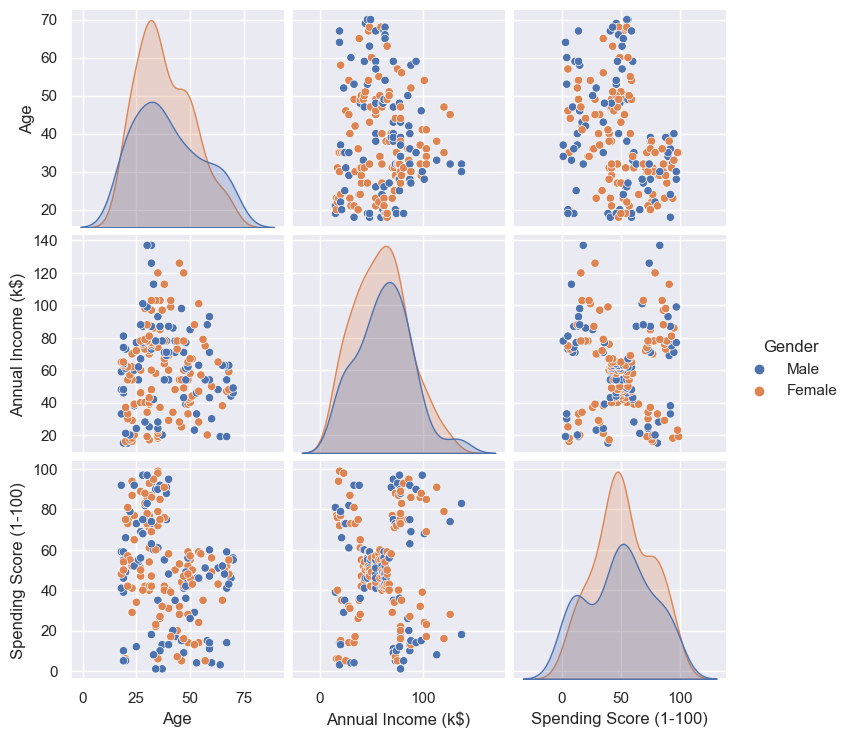

In [52]:
sns.pairplot(data=df, hue="Gender")

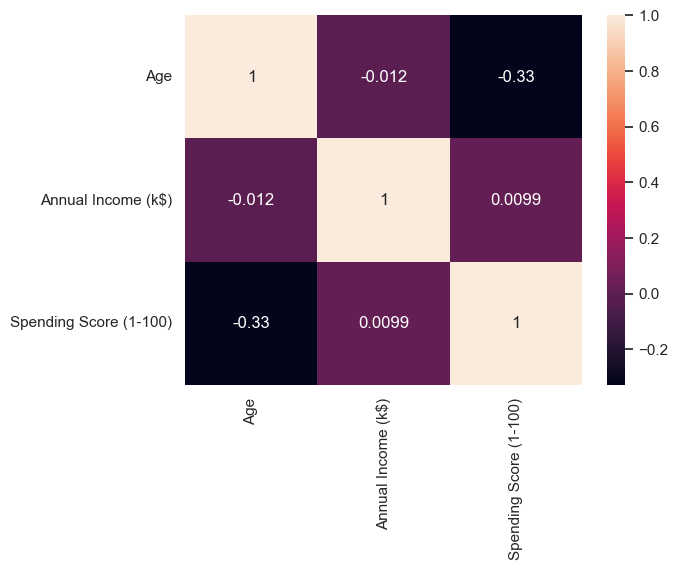

In [53]:
sns.heatmap(df_numeric.corr(), annot= True)
plt.show()

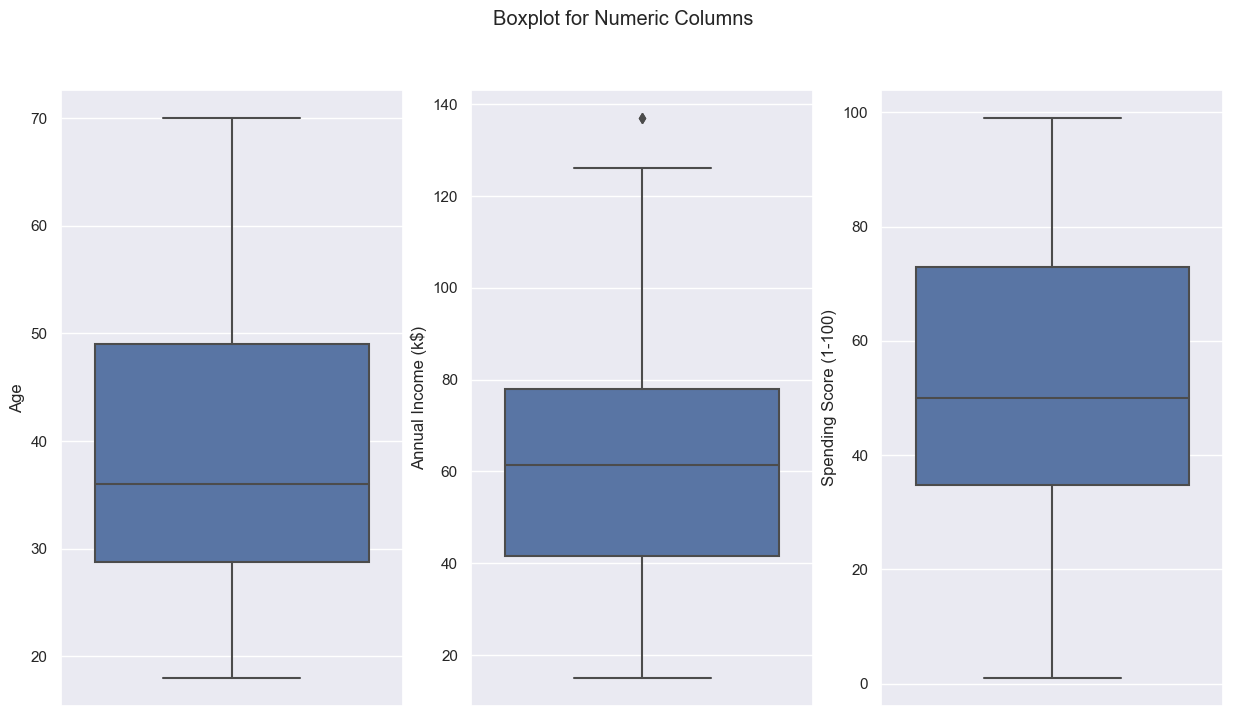

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=len(df_numeric.columns), figsize = (15,8))

for i,column in enumerate(df_numeric.columns):
    sns.boxplot(data=df, y=column, ax=ax[i])

plt.suptitle("Boxplot for Numeric Columns")
plt.show()

In [55]:
def add_values_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+p.get_width()/2.,p.get_height()), ha = "center", va="center", xytext=(0,5), fontsize=12, color="black",textcoords='offset points')

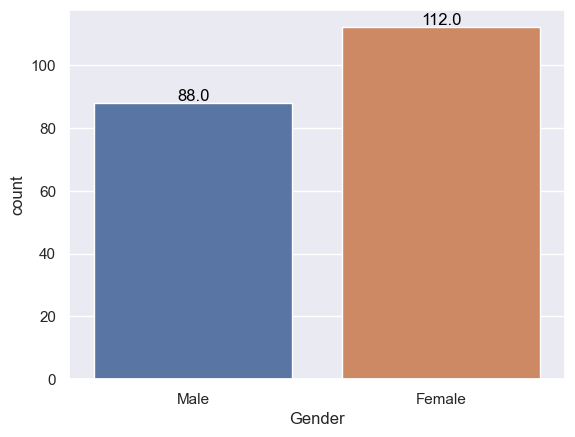

In [56]:
ax = sns.countplot(data = df, x="Gender")
add_values_labels(ax)

plt.show()

### 

### Data Cleaning

we remove the outlier especially in Annual Income columns based the distribution plot before

In [57]:
q1 = df_numeric["Annual Income (k$)"].quantile(0.25)
q3 = df_numeric["Annual Income (k$)"].quantile(0.75)

iqr = q3 - q1
upper_bound = q3 + 1.5*iqr

df_numeric_cleaned = df_numeric[df_numeric["Annual Income (k$)"]<=upper_bound]


### Modelling

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [59]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_numeric_cleaned)

### Clustering Age vs Annual Income

In [60]:
inertias = []

for i in range(1,8):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled[:,:2])
    inertias.append(km.inertia_)

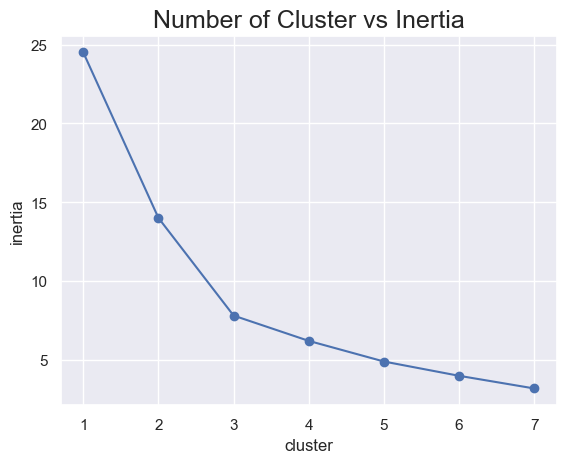

In [61]:
plt.plot(range(1,8),inertias, marker="o")

plt.title("Number of Cluster vs Inertia")
plt.xlabel("cluster")
plt.ylabel("inertia")

plt.show()

In [62]:
km = KMeans(n_clusters=3)
km.fit(df_scaled[:,:2])

KMeans(n_clusters=3)

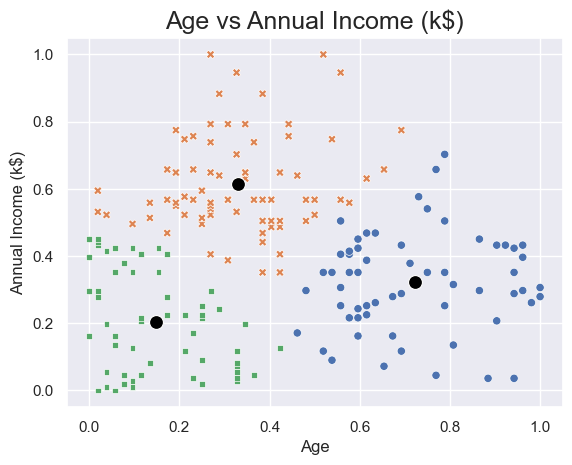

In [63]:
centroids = km.cluster_centers_
label = km.labels_

sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,1], hue=label, legend=False, style=label, palette="deep")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s = 100, c="black")
plt.title("Age vs Annual Income (k$)")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

plt.show()

### Age vs Spending Score (1-100)

In [64]:
inertias = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled[:,[0,2]])
    inertias.append(km.inertia_)

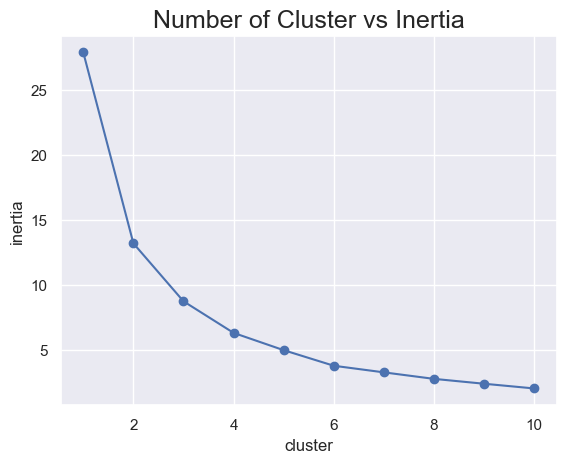

In [65]:
plt.plot(range(1,11),inertias, marker="o")

plt.title("Number of Cluster vs Inertia")
plt.xlabel("cluster")
plt.ylabel("inertia")

plt.show()

In [66]:
km = KMeans(n_clusters=4)
km.fit(df_scaled[:,[0,2]])

KMeans(n_clusters=4)

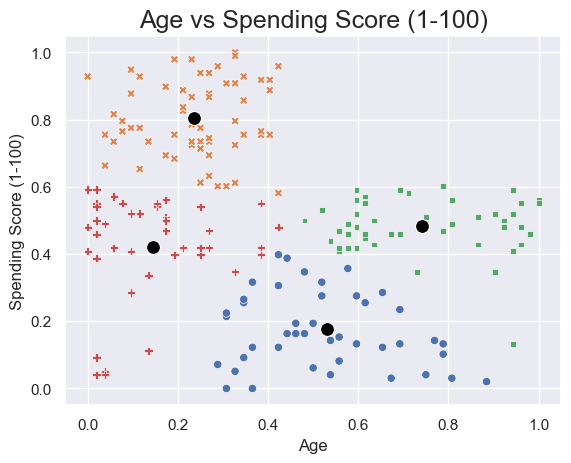

In [67]:
centroids = km.cluster_centers_
label = km.labels_

sns.scatterplot(x=df_scaled[:,0], y=df_scaled[:,2], hue=label, legend=False, style=label, palette="deep")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s = 100, c="black")
plt.title("Age vs Spending Score (1-100)")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")

plt.show()

### Annual Income vs Spending Score (1-100)

In [68]:
inertias = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_scaled[:,[1,2]])
    inertias.append(km.inertia_)

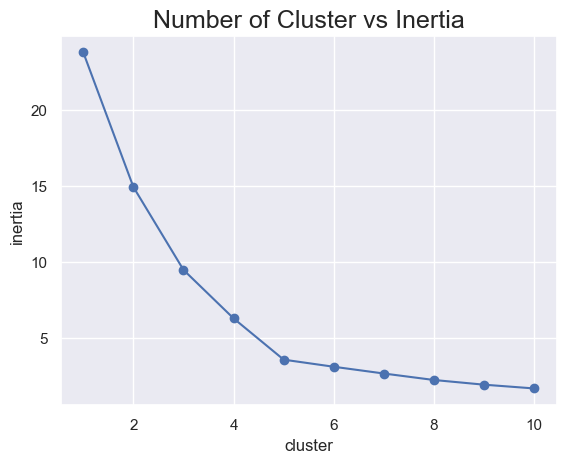

In [69]:
plt.plot(range(1,11),inertias, marker="o")

plt.title("Number of Cluster vs Inertia")
plt.xlabel("cluster")
plt.ylabel("inertia")

plt.show()

In [74]:
km = KMeans(n_clusters=5)
km.fit(df_scaled[:,[1,2]])

KMeans(n_clusters=5)

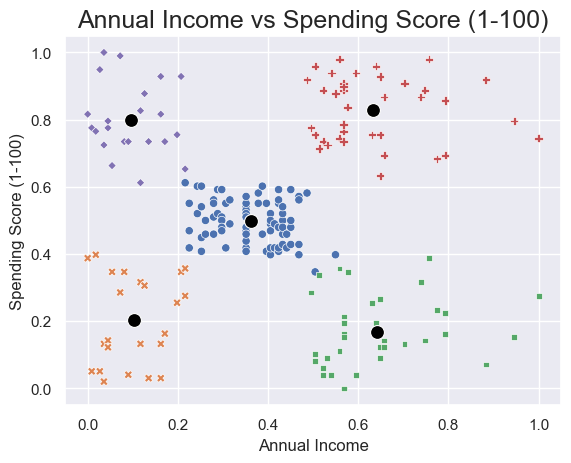

In [75]:
centroids = km.cluster_centers_
label = km.labels_

sns.scatterplot(x=df_scaled[:,1], y=df_scaled[:,2], hue=label, legend=False, style=label, palette="deep")
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s = 100, c="black")
plt.title("Annual Income vs Spending Score (1-100)")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score (1-100)")

plt.show()

### All the feature

In [72]:
one_hot = pd.get_dummies(df["Gender"])

df = pd.concat([df,one_hot], axis=1)
df.drop("Gender", axis=1,inplace=True)

In [76]:
df_filter = df[df.index.isin(df_numeric_cleaned.index)]

In [77]:
df_filter

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,False,True
1,21,15,81,False,True
2,20,16,6,True,False
3,23,16,77,True,False
4,31,17,40,True,False
...,...,...,...,...,...
193,38,113,91,True,False
194,47,120,16,True,False
195,35,120,79,True,False
196,45,126,28,True,False


In [79]:
inertias = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df_filter)
    inertias.append(km.inertia_)

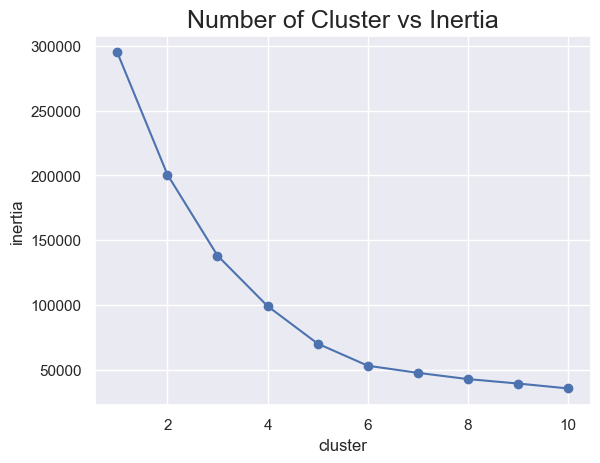

In [80]:
plt.plot(range(1,11),inertias, marker="o")

plt.title("Number of Cluster vs Inertia")
plt.xlabel("cluster")
plt.ylabel("inertia")

plt.show()